In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [3]:
# Load complete data about clubs
clubs_info_df = pd.read_json("../../parsing/parsedData/complete_clubs.json")
clubs_info_df.head(15)

,TeamID,Year,TeamCost,AverageAge,Legioners,TeamSize,PlayerIDS,NationalPlayersCount,TeamSizeRatio
0,1002,2014,"4,25 млн €","21,5",16,39,"[95621, 112797, 169963, 198986, 38793, 139304,...",11,NaN
1,1002,2015,"3,60 млн €","21,6",12,32,"[112797, 169963, 198986, 38793, 133770, 133613...",9,0.82
2,1002,2016,"3,48 млн €","21,0",10,38,"[112797, 169963, 198986, 324448, 133770, 13361...",15,1.19
3,1002,2017,"3,55 млн €","21,3",8,37,"[112797, 169963, 198986, 324448, 363402, 13361...",10,0.97
4,1002,2018,"5,80 млн €","22,4",9,39,"[198981, 112797, 169963, 198986, 324448, 36359...",13,1.05
5,1002,2019,"4,68 млн €","21,4",5,38,"[198981, 324448, 169963, 363402, 549282, 73962...",14,0.97
6,1002,2020,"5,15 млн €","21,0",3,40,"[198981, 324448, 242044, 363402, 739626, 24736...",16,1.05
7,1002,2021,"5,75 млн €","22,4",3,37,"[198981, 324448, 242044, 363402, 402119, 57422...",17,0.93
8,1002,2022,"5,06 млн €","22,3",3,38,"[242044, 324448, 363402, 402119, 198988, 24736...",14,1.03
9,1002,2023,"5,33 млн €","21,2",5,51,"[363402, 402119, 324448, 488270, 927920, 24736...",15,1.34


In [12]:
# Show shape
clubs_info_df.shape

(5896, 3)

In [13]:
# Observe data types
clubs_info_df.dtypes

TeamID       int64
Year         int64
Legioners    int64
dtype: object

In [ ]:
# Check axes
clubs_info_df.axes

[RangeIndex(start=0, stop=5896, step=1),
 Index(['TeamID ', 'Year', 'Legioners'], dtype='object')]

We saw extra space in the first column, which is "TeamID ". Ket us remove any unnecessary symbols

In [16]:
# Remove unnecessary symbols from columns
clubs_info_df.columns = clubs_info_df.columns.str.strip()

In [17]:
# Verify results
clubs_info_df.columns

Index(['TeamID', 'Year', 'Legioners'], dtype='object')

In [4]:
# Drop "TeamCost", "AverageAge", "TeamSize", "PlayerIDS", "NationalPlayersCount", and "TeamSizeRatio" columns, we will not use them
clubs_info_df.drop(["TeamCost", "AverageAge", "TeamSize", "PlayerIDS", "NationalPlayersCount", "TeamSizeRatio"], axis=1, inplace=True)
clubs_info_df.head(15)

,TeamID,Year,Legioners
0,1002,2014,16
1,1002,2015,12
2,1002,2016,10
3,1002,2017,8
4,1002,2018,9
5,1002,2019,5
6,1002,2020,3
7,1002,2021,3
8,1002,2022,3
9,1002,2023,5


In [19]:
# Check whether we compare all teams in the same conditions.
# Firstly, group by "TeamID" and count the number of rows for each team
clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"Legioners": "count"}) \
    .rename(columns={"Legioners": "Count"})

,TeamID,Count
0,3,11
1,5,11
2,11,11
3,12,11
4,13,11
...,...,...
531,64534,11
532,64780,11
533,69752,11
534,80996,11


In [21]:
# See if there are any teams with different number of rows (years)
clubs_info_df.groupby("TeamID", as_index=False) \
    .agg({"Legioners": "count"}) \
    .rename(columns={"Legioners": "Count"}) \
    .query("Count != 11")

,TeamID,Count


Great, we do not have such teams

In [22]:
# Sort Data Frame by "TeamID" and "Year" columns
clubs_info_df.sort_values(by=["TeamID", "Year"], inplace=True)
clubs_info_df.head(15)

,TeamID,Year,Legioners
2640,3,2014,22
2641,3,2015,17
2642,3,2016,23
2643,3,2017,28
2644,3,2018,20
2645,3,2019,22
2646,3,2020,22
2647,3,2021,17
2648,3,2022,21
2649,3,2023,16


In [24]:
# Get some statistics about number of legionnaires
clubs_info_df.Legioners.describe()

count    5896.000000
mean       18.628731
std         8.880340
min         0.000000
25%        13.000000
50%        19.000000
75%        25.000000
max        60.000000
Name: Legioners, dtype: float64

Interestingly, clubs usually have about 25-30 players, which team had 60 legionnaires?

In [25]:
clubs_info_df.sort_values(by=["Legioners"], ascending=False).head(15)

,TeamID,Year,Legioners
796,11912,2018,60
1280,162,2018,57
2070,2481,2016,56
2301,2714,2016,55
4899,631,2018,52
4897,631,2016,49
788,11910,2021,49
772,11907,2016,47
1278,162,2016,47
4970,64780,2023,46


Text(0, 0.5, 'Team ID')

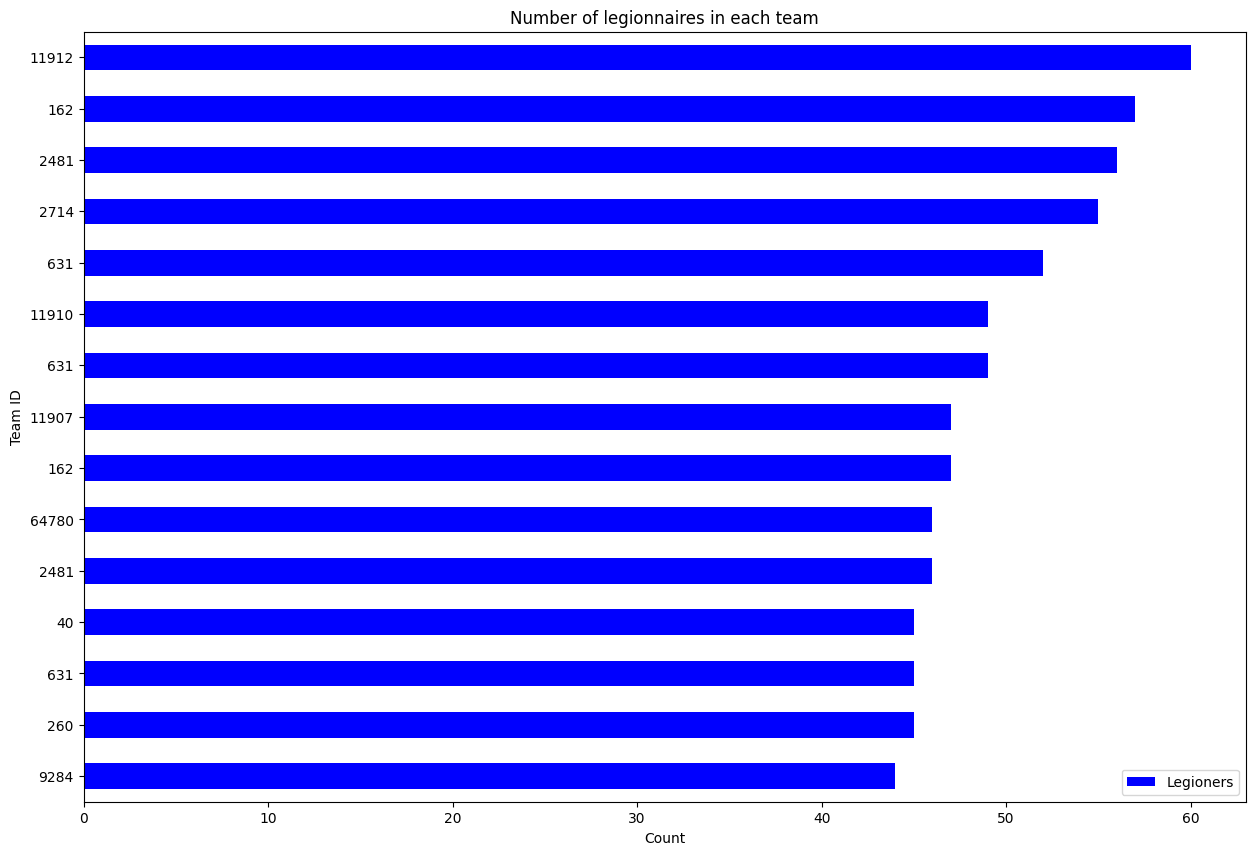

In [47]:
# Let us investigate which teams are leaders in legionnaires
plt.figure(figsize=(15, 10))
clubs_info_df.sort_values(by=["Legioners"], ascending=True).tail(15).plot(kind="barh", x="TeamID", y="Legioners", color="blue", ax=plt.gca())
plt.title("Number of legionnaires in each team")
plt.xlabel("Count")
plt.ylabel("Team ID")

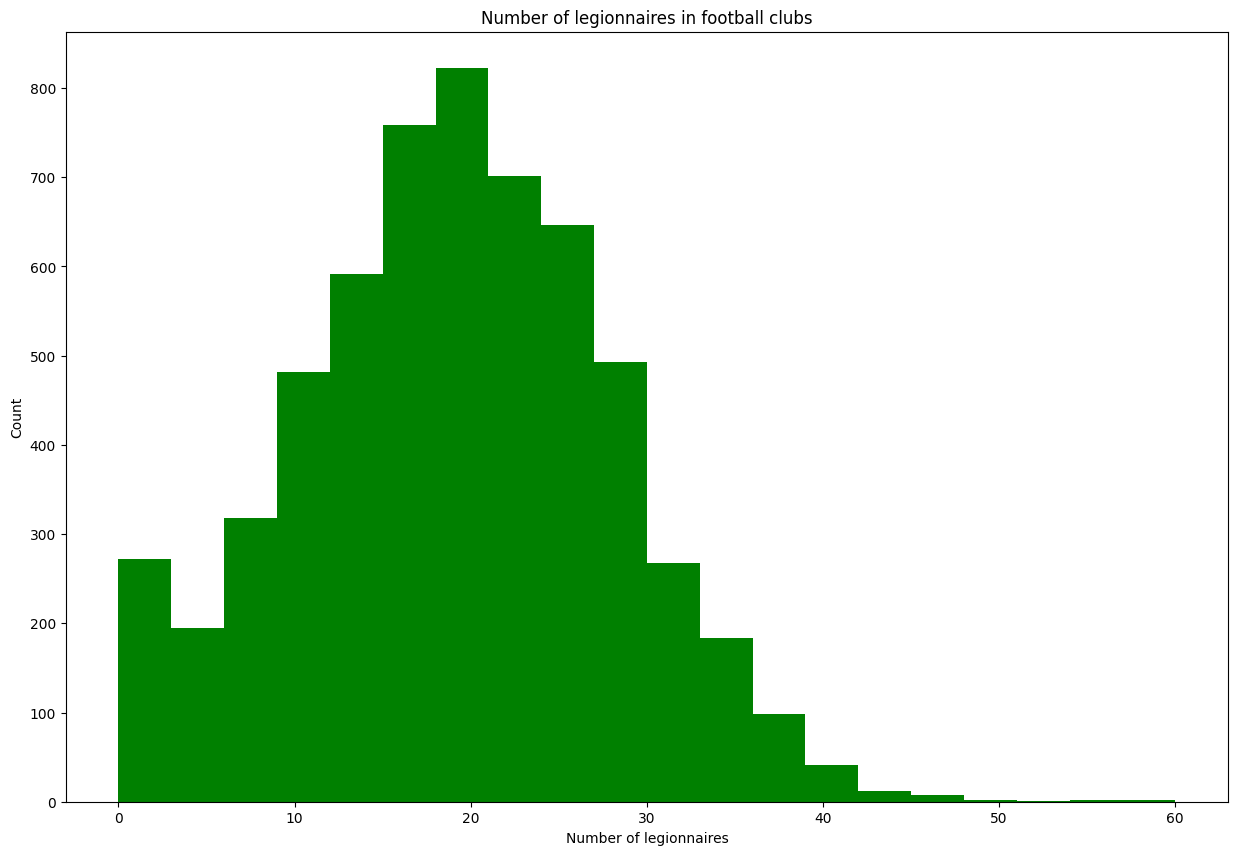

In [54]:
plt.figure(figsize=(15, 10))
plt.hist(clubs_info_df.Legioners, bins=20, color="green")
plt.xlabel("Number of legionnaires")
plt.ylabel("Count")
plt.title("Number of legionnaires in football clubs")
None

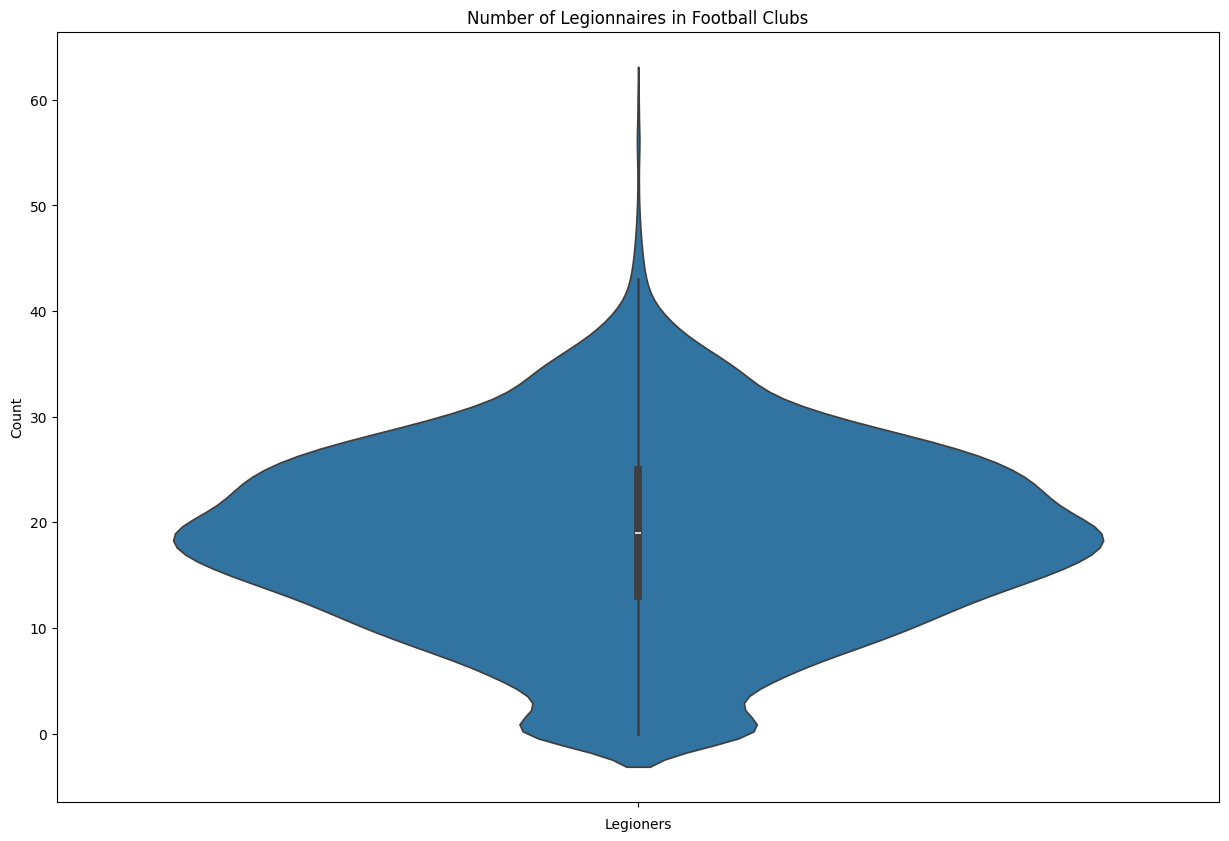

In [58]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=clubs_info_df.Legioners)
plt.title("Number of Legionnaires in Football Clubs")
plt.xlabel("Legioners")
plt.ylabel("Count")
None

In [59]:
# Write results to a file
with open("legionnaires_per_team.json", "w") as file:
    json.dump(clubs_info_df.to_dict(orient="records"), file, indent=4)